In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from keras.utils import to_categorical
from keras.utils.np_utils import to_categorical
from plot_metric.functions import BinaryClassification
from sklearn.metrics import accuracy_score, precision_score, f1_score,roc_curve, auc

Using TensorFlow backend.


In [2]:
data = pd.read_csv(r'C:/Users/35389/OneDrive/Desktop/pen drive/data_final.csv')

### Train and Test Set

In [3]:
from sklearn.model_selection import train_test_split

In [4]:
Y = data['target'].astype(int)
X = data.drop('target',axis=1)
X_train,X_test, y_train, y_test = train_test_split(X,Y)

In [5]:
y_total = list(y_train) + list(y_test)
y_categorical = to_categorical(y_total)
y_train_dl = y_categorical[:len(y_train)]
y_test_dl = y_categorical[len(y_train):]

### Random Forest Classifier

In [6]:
from sklearn.ensemble import RandomForestClassifier 

In [7]:
clf = RandomForestClassifier()
clf.fit(X_train, y_train)
clf.score(X_test,y_test)
y_pred = clf.predict(X_test)
accuracy= accuracy_score(y_test,y_pred)
precision = precision_score(y_test,y_pred)
f1 = f1_score(y_test,y_pred)
roc = roc_curve(y_test,y_pred)

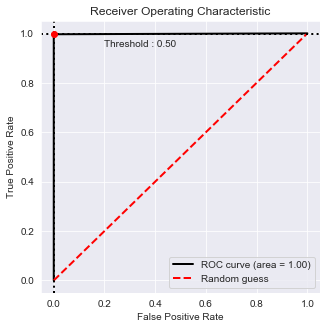

In [8]:
# Visualisation with plot_metric
bc = BinaryClassification(y_test, y_pred, labels=["Class 1", "Class 2"])

# Figures
plt.figure(figsize=(5,5))
bc.plot_roc_curve()
plt.show()

In [9]:
accuracy

0.9983912483912484

In [10]:
precision

1.0

### Support Vector Classifier

In [11]:
from sklearn.svm import SVC

In [12]:
clf = SVC()
clf.fit(X_train, y_train)
clf.score(X_test,y_test)
y_pred = clf.predict(X_test)
accuracy= accuracy_score(y_test,y_pred)
precision = precision_score(y_test,y_pred)
f1 = f1_score(y_test,y_pred)
roc = roc_curve(y_test,y_pred)

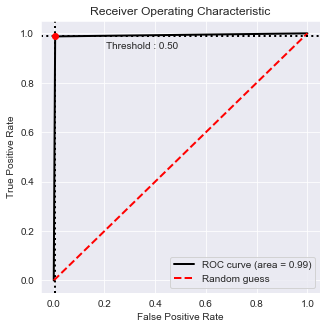

In [13]:
# Visualisation with plot_metric
bc = BinaryClassification(y_test, y_pred, labels=["Class 1", "Class 2"])

# Figures
plt.figure(figsize=(5,5))
bc.plot_roc_curve()
plt.show()

### Logistic Regression

In [14]:
from sklearn.linear_model import LogisticRegression # default parameter ingeneral problem accurate

In [15]:
clf = LogisticRegression()
clf.fit(X_train, y_train)
clf.score(X_test,y_test)
y_pred = clf.predict(X_test)
accuracy= accuracy_score(y_test,y_pred)
precision = precision_score(y_test,y_pred)
f1 = f1_score(y_test,y_pred)
roc = roc_curve(y_test,y_pred)

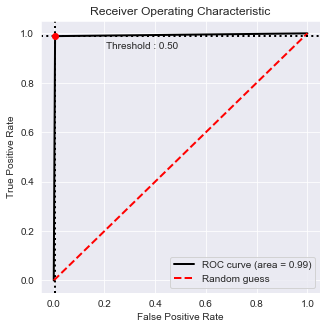

In [16]:
# Visualisation with plot_metric
bc = BinaryClassification(y_test, y_pred, labels=["Class 1", "Class 2"])

# Figures
plt.figure(figsize=(5,5))
bc.plot_roc_curve()
plt.show()

### Multilayer Perceptron

In [17]:
from keras.models import Sequential
from keras.layers import Dense


# Build the model.
model = Sequential([
  Dense(12, activation='relu', input_shape=(X.shape[1],)),
  Dense(6, activation='relu'),
  Dense(2, activation='softmax'),
])

# Compile the model.
model.compile(
  optimizer='adam',
  loss='categorical_crossentropy',
  metrics=['accuracy'],
)
print(model.summary())

# Train the model.
model.fit(
  X_train,
  to_categorical(y_train),
  epochs=10,
  batch_size=32,
)

# Evaluate the model.
score = model.evaluate(
  X_test,
  to_categorical(y_test)
)

y_pred_dl = model.predict(X_test)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 12)                96        
_________________________________________________________________
dense_2 (Dense)              (None, 6)                 78        
_________________________________________________________________
dense_3 (Dense)              (None, 2)                 14        
Total params: 188
Trainable params: 188
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/10
18647/18647 [==============================] - 1s 29us/step - loss: 0.6534 - accuracy: 0.8055
Epoch 2/10
18647/18647 [==============================] - 0s 20us/step - loss: 0.2662 - accuracy: 0.9195
Epoch 3/10
18647/18647 [==============================] - 0s 20us/step - loss: 0.1870 - accuracy: 0.9378
Epoch 4/10
18647/18647 [==============================] - 0s 20us/

In [18]:
y_pred = np.argmax(y_pred_dl,axis=1)
accuracy= accuracy_score(y_test,y_pred)
precision = precision_score(y_test,y_pred)
f1 = f1_score(y_test,y_pred)
roc = roc_curve(y_test,y_pred)

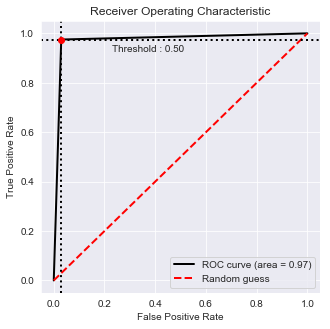

In [19]:
# Visualisation with plot_metric
bc = BinaryClassification(y_test, y_pred, labels=["Class 1", "Class 2"])

# Figures
plt.figure(figsize=(5,5))
bc.plot_roc_curve()
plt.show()

### Convolutional Neural Network

In [20]:
X_train_DL = X_train.values.reshape((-1,1,7))
X_test_DL = X_test.values.reshape((-1,1,7))

In [21]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv1D, MaxPooling2D
from keras import backend as K

batch_size = 10
num_classes = 2
epochs = 10

input_shape = (1, 7)
model = Sequential()
model.add(Conv1D(12, kernel_size=(1),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv1D(10, (1), activation='relu'))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(7, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

print(model.summary())

model.fit(X_train_DL, to_categorical(y_train),
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          )
score = model.evaluate(X_test_DL, to_categorical(y_test), verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

y_pred_dl = model.predict(X_test_DL)

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_1 (Conv1D)            (None, 1, 12)             96        
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 1, 10)             130       
_________________________________________________________________
dropout_1 (Dropout)          (None, 1, 10)             0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 10)                0         
_________________________________________________________________
dense_4 (Dense)              (None, 7)                 77        
_________________________________________________________________
dropout_2 (Dropout)          (None, 7)                 0         
_________________________________________________________________
dense_5 (Dense)              (None, 2)                

In [22]:
y_pred = np.argmax(y_pred_dl,axis=1)
accuracy= accuracy_score(y_test,y_pred)
precision = precision_score(y_test,y_pred)
f1 = f1_score(y_test,y_pred)
roc = roc_curve(y_test,y_pred)

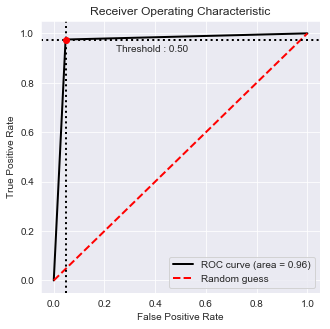

In [23]:
# Visualisation with plot_metric
bc = BinaryClassification(y_test, y_pred, labels=["Class 1", "Class 2"])

# Figures
plt.figure(figsize=(5,5))
bc.plot_roc_curve()
plt.show()

### Recurrent Neural Network

In [24]:
from keras.layers import GRU, SimpleRNN, Dense

epochs = 10

model1 = Sequential()

# The output of GRU will be a 3D tensor of shape (batch_size, timesteps, 15)
model1.add(GRU(15, return_sequences=True))

# The output of SimpleRNN will be a 2D tensor of shape (batch_size, 12)
model1.add(SimpleRNN(12))

model1.add(Dense(2, activation='softmax'))
model1.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])


model1.fit(X_train_DL, to_categorical(y_train),
          batch_size=batch_size,
          epochs=epochs,
          verbose=1)
print(model1.summary())

score = model1.evaluate(X_test_DL, to_categorical(y_test), verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

y_pred_dl = model1.predict(X_test_DL)

Epoch 1/10
18647/18647 [==============================] - 3s 147us/step - loss: 0.2215 - accuracy: 0.9202
Epoch 2/10
18647/18647 [==============================] - 2s 128us/step - loss: 0.1538 - accuracy: 0.9422
Epoch 3/10
18647/18647 [==============================] - 3s 137us/step - loss: 0.1360 - accuracy: 0.9454
Epoch 4/10
18647/18647 [==============================] - 2s 128us/step - loss: 0.1202 - accuracy: 0.9519
Epoch 5/10
18647/18647 [==============================] - 2s 128us/step - loss: 0.1085 - accuracy: 0.9588
Epoch 6/10
18647/18647 [==============================] - 2s 128us/step - loss: 0.0994 - accuracy: 0.9611
Epoch 7/10
18647/18647 [==============================] - 3s 149us/step - loss: 0.0955 - accuracy: 0.9634
Epoch 8/10
18647/18647 [==============================] - 3s 161us/step - loss: 0.0905 - accuracy: 0.9640
Epoch 9/10
18647/18647 [==============================] - 3s 144us/step - loss: 0.0869 - accuracy: 0.9658
Epoch 10/10
18647/18647 [=====================

In [25]:
y_pred = np.argmax(y_pred_dl,axis=1)
accuracy= accuracy_score(y_test,y_pred)
precision = precision_score(y_test,y_pred)
f1 = f1_score(y_test,y_pred)
roc = roc_curve(y_test,y_pred)

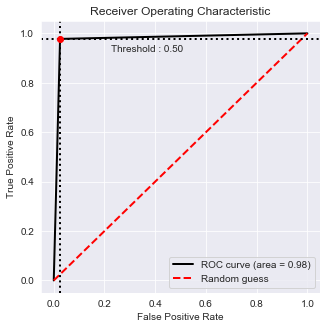

In [26]:
# Visualisation with plot_metric
bc = BinaryClassification(y_test, y_pred, labels=["Class 1", "Class 2"])

# Figures
plt.figure(figsize=(5,5))
bc.plot_roc_curve()
plt.show()

# Modeling at  0.4

## Train and Test data

In [27]:
Y = data['target'].astype(int)
X = data.drop('target',axis=1)
X_train,X_test, y_train, y_test = train_test_split(X,Y,test_size=0.6)

In [28]:
y_total = list(y_train) + list(y_test)
y_categorical = to_categorical(y_total)
y_train_dl = y_categorical[:len(y_train)]
y_test_dl = y_categorical[len(y_train):]

## Random Forest Classifier

In [30]:
clf = RandomForestClassifier()
clf.fit(X_train, y_train)
clf.score(X_test,y_test)
y_pred = clf.predict(X_test)
accuracy_rf = accuracy_score(y_test,y_pred)
precision_rf = precision_score(y_test,y_pred)
f1_rf = f1_score(y_test,y_pred)
roc_rf = roc_curve(y_test,y_pred)

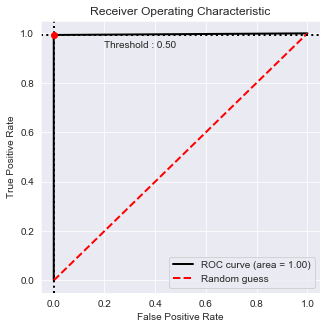

In [31]:
# Visualisation with plot_metric
bc = BinaryClassification(y_test, y_pred, labels=["Class 1", "Class 2"])

# Figures
plt.figure(figsize=(5,5))
bc.plot_roc_curve()
plt.show()

## Support Vector Classifier

In [32]:
from sklearn.svm import SVC

In [33]:
clf = SVC()
clf.fit(X_train, y_train)
clf.score(X_test,y_test)
y_pred = clf.predict(X_test)
accuracy_svm= accuracy_score(y_test,y_pred)
precision_svm = precision_score(y_test,y_pred)
f1_svm = f1_score(y_test,y_pred)
roc_svm = roc_curve(y_test,y_pred)

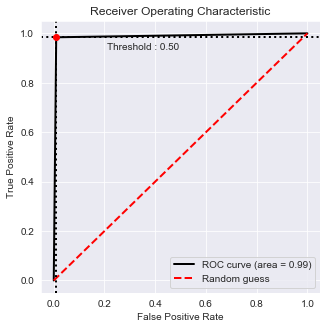

In [34]:
# Visualisation with plot_metric
bc = BinaryClassification(y_test, y_pred, labels=["Class 1", "Class 2"])

# Figures
plt.figure(figsize=(5,5))
bc.plot_roc_curve()
plt.show()

## Logistic Regression

In [38]:
from sklearn.linear_model import LogisticRegression

In [39]:
clf = LogisticRegression()
clf.fit(X_train, y_train)
clf.score(X_test,y_test)
y_pred = clf.predict(X_test)
accuracy_lr= accuracy_score(y_test,y_pred)
precision_lr = precision_score(y_test,y_pred)
f1_lr = f1_score(y_test,y_pred)
roc_lr = roc_curve(y_test,y_pred)

C:\Users\35389\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


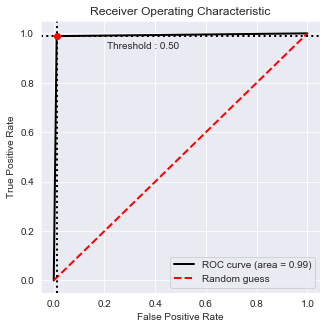

In [40]:
# Visualisation with plot_metric
bc = BinaryClassification(y_test, y_pred, labels=["Class 1", "Class 2"])

# Figures
plt.figure(figsize=(5,5))
bc.plot_roc_curve()
plt.show()

## Multilayer Perceptron

In [42]:
from keras.models import Sequential
from keras.layers import Dense


# Build the model.
model = Sequential([
  Dense(12, activation='relu', input_shape=(X.shape[1],)),
  Dense(6, activation='relu'),
  Dense(2, activation='softmax'),
])

# Compile the model.
model.compile(
  optimizer='adam',
  loss='categorical_crossentropy',
  metrics=['accuracy'],
)
print(model.summary())

# Train the model.
model.fit(
  X_train,
  to_categorical(y_train),
  epochs=10,
  batch_size=32,
)

# Evaluate the model.
score = model.evaluate(
  X_test,
  to_categorical(y_test)
)

y_pred_dl = model.predict(X_test)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 12)                96        
_________________________________________________________________
dense_8 (Dense)              (None, 6)                 78        
_________________________________________________________________
dense_9 (Dense)              (None, 2)                 14        
Total params: 188
Trainable params: 188
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/10
9945/9945 [==============================] - 0s 25us/step - loss: 1.6062 - accuracy: 0.7236
Epoch 2/10
9945/9945 [==============================] - 0s 20us/step - loss: 0.3705 - accuracy: 0.8823
Epoch 3/10
9945/9945 [==============================] - 0s 20us/step - loss: 0.2906 - accuracy: 0.9126
Epoch 4/10
9945/9945 [==============================] - 0s 22us/step - l

In [43]:
y_pred_mlp = np.argmax(y_pred_dl,axis=1)
accuracy_mlp= accuracy_score(y_test,y_pred)
precision_mlp = precision_score(y_test,y_pred)
f1_mlp = f1_score(y_test,y_pred)
roc_mlp = roc_curve(y_test,y_pred)

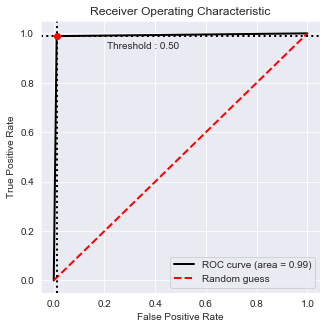

In [44]:
# Visualisation with plot_metric
bc = BinaryClassification(y_test, y_pred, labels=["Class 1", "Class 2"])

# Figures
plt.figure(figsize=(5,5))
bc.plot_roc_curve()
plt.show()

## Convolutional Neural Network

In [45]:
X_train_DL = X_train.values.reshape((-1,1,7))
X_test_DL = X_test.values.reshape((-1,1,7))

In [46]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv1D, MaxPooling2D
from keras import backend as K

batch_size = 10
num_classes = 2
epochs = 10

input_shape = (1, 7)
model = Sequential()
model.add(Conv1D(12, kernel_size=(1),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv1D(10, (1), activation='relu'))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(7, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

print(model.summary())

model.fit(X_train_DL, to_categorical(y_train),
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          )
score = model.evaluate(X_test_DL, to_categorical(y_test), verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

y_pred_dl = model.predict(X_test_DL)

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_3 (Conv1D)            (None, 1, 12)             96        
_________________________________________________________________
conv1d_4 (Conv1D)            (None, 1, 10)             130       
_________________________________________________________________
dropout_3 (Dropout)          (None, 1, 10)             0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 10)                0         
_________________________________________________________________
dense_10 (Dense)             (None, 7)                 77        
_________________________________________________________________
dropout_4 (Dropout)          (None, 7)                 0         
_________________________________________________________________
dense_11 (Dense)             (None, 2)                

In [47]:
y_pred = np.argmax(y_pred_dl,axis=1)
accuracy_cnn= accuracy_score(y_test,y_pred)
precision_cnn = precision_score(y_test,y_pred)
f1_cnn = f1_score(y_test,y_pred)
roc_cnn = roc_curve(y_test,y_pred)

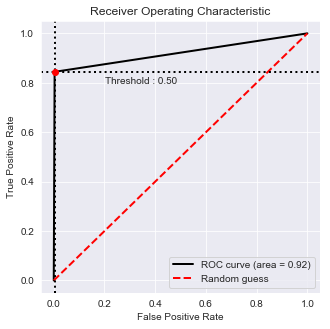

In [48]:
# Visualisation with plot_metric
bc = BinaryClassification(y_test, y_pred, labels=["Class 1", "Class 2"])

# Figures
plt.figure(figsize=(5,5))
bc.plot_roc_curve()
plt.show()

## Recurrent Neural Network

In [49]:
from keras.layers import GRU, SimpleRNN, Dense

epochs = 10

model1 = Sequential()

# The output of GRU will be a 3D tensor of shape (batch_size, timesteps, 15)
model1.add(GRU(15, return_sequences=True))

# The output of GRU will be a 3D tensor of shape (batch_size, timesteps, 15)
model1.add(GRU(15, return_sequences=True))

# The output of SimpleRNN will be a 2D tensor of shape (batch_size, 12)
model1.add(SimpleRNN(12))

model1.add(Dense(2, activation='softmax'))
model1.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])


model1.fit(X_train_DL, to_categorical(y_train),
          batch_size=batch_size,
          epochs=epochs,
          verbose=1)
print(model1.summary())

score = model1.evaluate(X_test_DL, to_categorical(y_test), verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

y_pred_dl = model1.predict(X_test_DL)

Epoch 1/10
9945/9945 [==============================] - 2s 246us/step - loss: 0.2808 - accuracy: 0.8901
Epoch 2/10
9945/9945 [==============================] - 2s 198us/step - loss: 0.1679 - accuracy: 0.9363
Epoch 3/10
9945/9945 [==============================] - 2s 177us/step - loss: 0.1301 - accuracy: 0.9459
Epoch 4/10
9945/9945 [==============================] - 2s 177us/step - loss: 0.1145 - accuracy: 0.9537
Epoch 5/10
9945/9945 [==============================] - 2s 191us/step - loss: 0.1087 - accuracy: 0.9556
Epoch 6/10
9945/9945 [==============================] - 2s 199us/step - loss: 0.1018 - accuracy: 0.9584
Epoch 7/10
9945/9945 [==============================] - 2s 180us/step - loss: 0.0974 - accuracy: 0.9628
Epoch 8/10
9945/9945 [==============================] - 2s 186us/step - loss: 0.0954 - accuracy: 0.9624
Epoch 9/10
9945/9945 [==============================] - 2s 208us/step - loss: 0.0923 - accuracy: 0.9622
Epoch 10/10
9945/9945 [==============================] - 2s 185u

In [50]:
y_pred = np.argmax(y_pred_dl,axis=1)
accuracy_rnn= accuracy_score(y_test,y_pred)
precision_rnn = precision_score(y_test,y_pred)
f1_rnn = f1_score(y_test,y_pred)
roc_rnn = roc_curve(y_test,y_pred)

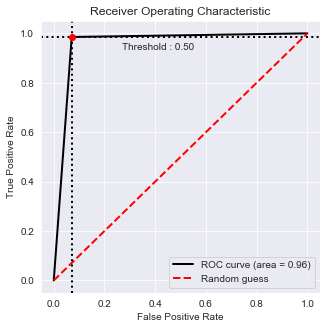

In [51]:
# Visualisation with plot_metric
bc = BinaryClassification(y_test, y_pred, labels=["Class 1", "Class 2"])

# Figures
plt.figure(figsize=(5,5))
bc.plot_roc_curve()
plt.show()

In [52]:
#metric values for random forest
accuracy_rf, precision_rf, f1_rf 

(0.9971846091969433, 1.0, 0.9968119022316684)

In [53]:
#metric values for SVM
accuracy_svm, precision_svm, f1_svm

(0.9875988738436787, 0.9878474859486557, 0.9859752861799712)

In [54]:
#metric values for logistic regression
accuracy_lr, precision_lr, f1_lr

(0.9886714036734147, 0.9856690300196108, 0.9872327566669185)

In [55]:
#metric values for MLP
accuracy_mlp, precision_mlp, f1_mlp 

(0.9886714036734147, 0.9856690300196108, 0.9872327566669185)

In [56]:
#metric values for CNN
accuracy_cnn, precision_cnn, f1_cnn

(0.9291459981230727, 0.9950062421972534, 0.9134670487106018)

In [57]:
#metric values for RNN
accuracy_rnn, precision_rnn, f1_rnn 

(0.9540823166644322, 0.9171714325961403, 0.9500255343984826)

In [58]:
roc_rf, roc_svm, roc_lr, roc_mlp, roc_cnn, roc_rnn

((array([0., 0., 1.]),
  array([0.        , 0.99364407, 1.        ]),
  array([2, 1, 0])),
 (array([0.        , 0.00962696, 1.        ]),
  array([0.        , 0.98411017, 1.        ]),
  array([2, 1, 0])),
 (array([0.        , 0.01143201, 1.        ]),
  array([0.        , 0.98880145, 1.        ]),
  array([2, 1, 0])),
 (array([0.        , 0.01143201, 1.        ]),
  array([0.        , 0.98880145, 1.        ]),
  array([2, 1, 0])),
 (array([0.        , 0.00336943, 1.        ]),
  array([0.        , 0.84427966, 1.        ]),
  array([2, 1, 0], dtype=int64)),
 (array([0.        , 0.07075812, 1.        ]),
  array([0.        , 0.98532082, 1.        ]),
  array([2, 1, 0], dtype=int64)))

# Modeling_Cross_Validation

## Train and Test data

In [75]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from keras.utils import to_categorical
from plot_metric.functions import BinaryClassification
from sklearn.metrics import accuracy_score, precision_score, f1_score,roc_auc_score

In [59]:
from sklearn.model_selection import train_test_split

In [60]:
Y = data['target'].astype(int)
X = data.drop('target',axis=1)

## Cross validation

In [64]:
from sklearn.model_selection import cross_validate
from sklearn import metrics
from sklearn.metrics import make_scorer
scoring = ['accuracy', 'precision', 'f1','roc_auc']

## Random Forest Classifier

In [62]:
from sklearn.ensemble import RandomForestClassifier 

In [63]:
clf = RandomForestClassifier()
scores = cross_validate(clf, X, Y, cv=5, scoring=scoring)

accuracy_rf = scores['test_accuracy'].mean()
precision_rf = scores['test_precision'].mean()
f1_rf = scores['test_f1'].mean()
roc_rf = scores['test_roc_auc'].mean()

## Support Vector Classifier

In [65]:
from sklearn.svm import SVC

In [66]:
clf = SVC()
scores = cross_validate(clf, X, Y, cv=5, scoring=scoring)

accuracy_svm = scores['test_accuracy'].mean()
precision_svm = scores['test_precision'].mean()
f1_svm = scores['test_f1'].mean()
roc_svm = scores['test_roc_auc'].mean()

## Logistic Regression

In [68]:
from sklearn.linear_model import LogisticRegression

In [69]:
clf = LogisticRegression()
scores = cross_validate(clf, X, Y, cv=5, scoring=scoring)

accuracy_lr = scores['test_accuracy'].mean()
precision_lr = scores['test_precision'].mean()
f1_lr = scores['test_f1'].mean()
roc_lr = scores['test_roc_auc'].mean()

C:\Users\35389\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


## Deep Learning Models

In [70]:
from sklearn.model_selection import KFold
X = X.values
Y = Y.values
kf = KFold(n_splits=2)

## Multilayer Perceptron

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_25 (Dense)             (None, 12)                96        
_________________________________________________________________
dense_26 (Dense)             (None, 6)                 78        
_________________________________________________________________
dense_27 (Dense)             (None, 2)                 14        
Total params: 188
Trainable params: 188
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/10
12431/12431 [==============================] - 0s 24us/step - loss: 0.6608 - accuracy: 0.8374
Epoch 2/10
12431/12431 [==============================] - 0s 21us/step - loss: 0.3313 - accuracy: 0.9249
Epoch 3/10
12431/12431 [==============================] - 0s 24us/step - loss: 0.2667 - accuracy: 0.9332
Epoch 4/10
12431/12431 [==============================] - 0s 20us

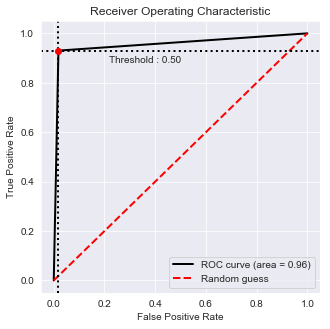

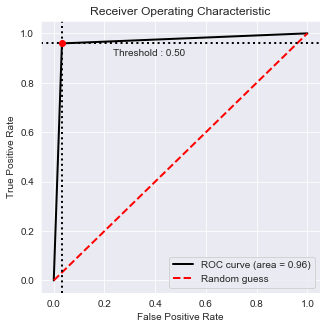

In [76]:
from keras.models import Sequential
from keras.layers import Dense

accuracy_mlp = []
precision_mlp= []
f1_mlp = []
roc_mlp = []


for train, test in kf.split(X):
    X_train = X[train]
    X_test = X[test]
    y_train = Y[train]
    y_test = Y[test]

    # Build the model.
    model = Sequential([
      Dense(12, activation='relu', input_shape=(X.shape[1],)),
      Dense(6, activation='relu'),
      Dense(2, activation='softmax'),
    ])

    # Compile the model.
    model.compile(
      optimizer='adam',
      loss='categorical_crossentropy',
      metrics=['accuracy'],
    )
    print(model.summary())

    # Train the model.
    model.fit(
      X_train,
      to_categorical(y_train),
      epochs=10,
      batch_size=32,
    )

    # Evaluate the model.
    score = model.evaluate(
      X_test,
      to_categorical(y_test)
    )

    y_pred_dl = model.predict(X_test)
    print('Test loss:', score[0])
    print('Test accuracy:', score[1])
    
    y_pred= np.argmax(y_pred_dl,axis=1)
    accuracy_mlp.append(accuracy_score(y_test,y_pred))
    precision_mlp.append(precision_score(y_test,y_pred))
    f1_mlp.append(f1_score(y_test,y_pred))
    roc_mlp.append(roc_auc_score(y_test,y_pred))
    
    # Visualisation with plot_metric
    bc = BinaryClassification(y_test, y_pred, labels=["Class 1", "Class 2"])

    # Figures
    plt.figure(figsize=(5,5))
    bc.plot_roc_curve()
    
accuracy_mlp = np.mean(accuracy_mlp)
precision_mlp= np.mean(precision_mlp)
f1_mlp = np.mean(f1_mlp)
roc_mlp = np.mean(roc_mlp)

## Convolutional Neural Network

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_5 (Conv1D)            (None, 1, 12)             96        
_________________________________________________________________
conv1d_6 (Conv1D)            (None, 1, 10)             130       
_________________________________________________________________
dropout_5 (Dropout)          (None, 1, 10)             0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 10)                0         
_________________________________________________________________
dense_31 (Dense)             (None, 7)                 77        
_________________________________________________________________
dropout_6 (Dropout)          (None, 7)                 0         
_________________________________________________________________
dense_32 (Dense)             (None, 2)               

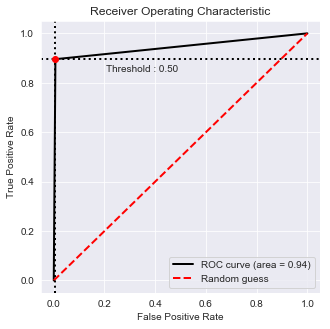

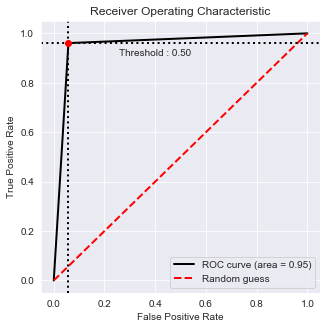

In [77]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv1D, MaxPooling2D
from keras import backend as K

batch_size = 10
num_classes = 2
epochs = 10
input_shape = (1, 7)

accuracy_cnn = []
precision_cnn= []
f1_cnn = []
roc_cnn = []


for train, test in kf.split(X):
    X_train = X[train]
    X_test = X[test]
    y_train = Y[train]
    y_test = Y[test]

    X_train = X_train.reshape((-1,1,7))
    X_test = X_test.reshape((-1,1,7))

    model = Sequential()
    model.add(Conv1D(12, kernel_size=(1),
                     activation='relu',
                     input_shape=input_shape))
    model.add(Conv1D(10, (1), activation='relu'))
    model.add(Dropout(0.25))
    model.add(Flatten())
    model.add(Dense(7, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(num_classes, activation='softmax'))

    model.compile(loss=keras.losses.categorical_crossentropy,
                  optimizer=keras.optimizers.Adadelta(),
                  metrics=['accuracy'])

    print(model.summary())

    model.fit(X_train, to_categorical(y_train),
              batch_size=batch_size,
              epochs=epochs,
              verbose=1,
              )
    score = model.evaluate(X_test, to_categorical(y_test), verbose=0)
    print('Test loss:', score[0])
    print('Test accuracy:', score[1])

    y_pred_dl = model.predict(X_test)
    
    y_pred= np.argmax(y_pred_dl,axis=1)
    accuracy_cnn.append(accuracy_score(y_test,y_pred))
    precision_cnn.append(precision_score(y_test,y_pred))
    f1_cnn.append(f1_score(y_test,y_pred))
    roc_cnn.append(roc_auc_score(y_test,y_pred))
    
    # Visualisation with plot_metric
    bc = BinaryClassification(y_test, y_pred, labels=["Class 1", "Class 2"])

    # Figures
    plt.figure(figsize=(5,5))
    bc.plot_roc_curve()
    
accuracy_cnn = np.mean(accuracy_cnn)
precision_cnn= np.mean(precision_cnn)
f1_cnn = np.mean(f1_cnn)
roc_cnn = np.mean(roc_cnn)
    

## Recurrent Neural Network

Epoch 1/10
12431/12431 [==============================] - 3s 237us/step - loss: 0.2236 - accuracy: 0.9122
Epoch 2/10
12431/12431 [==============================] - 2s 183us/step - loss: 0.1484 - accuracy: 0.9390
Epoch 3/10
12431/12431 [==============================] - 2s 160us/step - loss: 0.1285 - accuracy: 0.9478
Epoch 4/10
12431/12431 [==============================] - 2s 165us/step - loss: 0.1209 - accuracy: 0.9508
Epoch 5/10
12431/12431 [==============================] - 2s 194us/step - loss: 0.1148 - accuracy: 0.9547
Epoch 6/10
12431/12431 [==============================] - 2s 183us/step - loss: 0.1118 - accuracy: 0.9544
Epoch 7/10
12431/12431 [==============================] - 2s 179us/step - loss: 0.1072 - accuracy: 0.9570
Epoch 8/10
12431/12431 [==============================] - 2s 181us/step - loss: 0.1059 - accuracy: 0.9601
Epoch 9/10
12431/12431 [==============================] - 2s 195us/step - loss: 0.1022 - accuracy: 0.9610
Epoch 10/10
12431/12431 [=====================

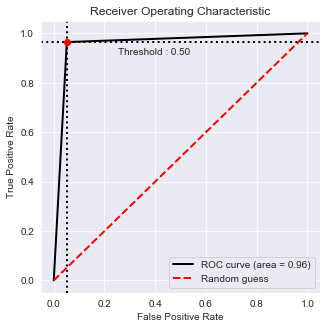

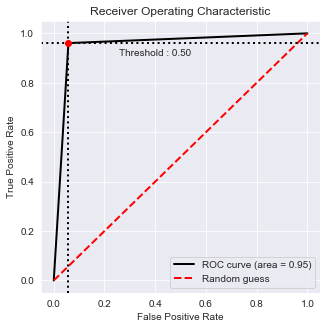

In [78]:
from keras.layers import GRU, SimpleRNN, Dense

epochs = 10


accuracy_rnn = []
precision_rnn= []
f1_rnn = []
roc_rnn = []


for train, test in kf.split(X):
    X_train = X[train]
    X_test = X[test]
    y_train = Y[train]
    y_test = Y[test]
    
    X_train = X_train.reshape((-1,1,7))
    X_test = X_test.reshape((-1,1,7))

    model1 = Sequential()

    # The output of GRU will be a 3D tensor of shape (batch_size, timesteps, 15)
    model1.add(GRU(15, return_sequences=True))

    # The output of GRU will be a 3D tensor of shape (batch_size, timesteps, 15)
    model1.add(GRU(15, return_sequences=True))

    # The output of SimpleRNN will be a 2D tensor of shape (batch_size, 12)
    model1.add(SimpleRNN(12))

    model1.add(Dense(2, activation='softmax'))
    model1.compile(loss=keras.losses.categorical_crossentropy,
                  optimizer=keras.optimizers.Adadelta(),
                  metrics=['accuracy'])


    model1.fit(X_train, to_categorical(y_train),
              batch_size=batch_size,
              epochs=epochs,
              verbose=1)
    print(model1.summary())

    score = model1.evaluate(X_test, to_categorical(y_test), verbose=0)
    print('Test loss:', score[0])
    print('Test accuracy:', score[1])

    y_pred_dl = model.predict(X_test)
    
    y_pred= np.argmax(y_pred_dl,axis=1)
    accuracy_rnn.append(accuracy_score(y_test,y_pred))
    precision_rnn.append(precision_score(y_test,y_pred))
    f1_rnn.append(f1_score(y_test,y_pred))
    roc_rnn.append(roc_auc_score(y_test,y_pred))
    
    # Visualisation with plot_metric
    bc = BinaryClassification(y_test, y_pred, labels=["Class 1", "Class 2"])

    # Figures
    plt.figure(figsize=(5,5))
    bc.plot_roc_curve()
    
accuracy_rnn = accuracy_cnn.mean()
precision_rnn= precision_cnn.mean()
f1_rnn = f1_cnn.mean()
roc_rnn = roc_cnn.mean()

In [79]:
#metric values for random forest
accuracy_rf, precision_rf, f1_rf 

(0.997908512888342, 0.9998164716581549, 0.9976219780624532)

In [80]:
#metric values for SVM
accuracy_svm, precision_svm, f1_svm

(0.9898644312432753, 0.9905749365092238, 0.9884806503969594)

In [81]:
#metric values for logistic regression
accuracy_lr, precision_lr, f1_lr

(0.989502395801366, 0.9887725447577453, 0.9880866531813839)

In [82]:
#metric values for MLP
accuracy_mlp, precision_mlp, f1_mlp 

(0.9611472089123726, 0.9667443728281611, 0.9554701519433959)

In [83]:
#metric values for CNN
accuracy_cnn, precision_cnn, f1_cnn

(0.9494027527447003, 0.9581131787486821, 0.9417003972691058)

In [84]:
#metric values for RNN
accuracy_rnn, precision_rnn, f1_rnn 

(0.9494027527447003, 0.9581131787486821, 0.9417003972691058)

In [85]:
roc_rf, roc_svm, roc_lr, roc_mlp, roc_cnn, roc_rnn


(0.9996885638718987,
 0.9981395315723904,
 0.995094511130385,
 0.959711088455348,
 0.947951686204686,
 0.947951686204686)

# Model Matrix Plot

In [86]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [88]:
accuracy = pd.read_csv(r'C:/Users/35389/OneDrive/Desktop/pen drive/code/code/accuracy.csv')
precision = pd.read_csv(r'C:/Users/35389/OneDrive/Desktop/pen drive/code/code/precision.csv')
f1_score = pd.read_csv(r'C:/Users/35389/OneDrive/Desktop/pen drive/code/code/f1_score.csv')


Text(0, 0.5, 'accuracy')

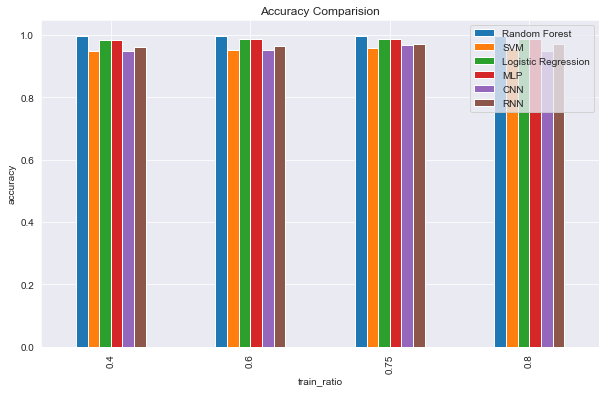

In [89]:
accuracy.index = accuracy.train_ratio
accuracy = accuracy.drop('train_ratio',axis=1)

accuracy.plot.bar(figsize=(10,6))
plt.title('Accuracy Comparision')
plt.ylabel('accuracy')

Text(0, 0.5, 'precision')

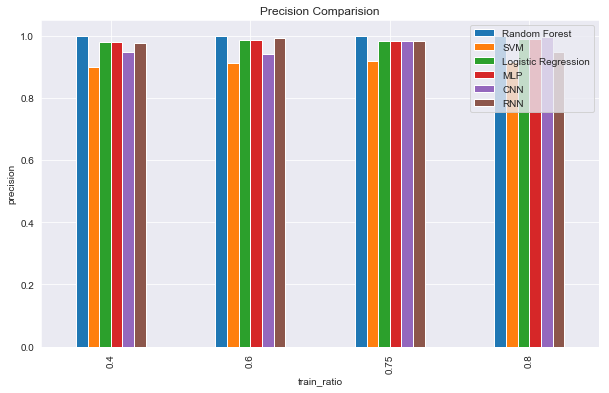

In [90]:
precision.index = precision.train_ratio
precision = precision.drop('train_ratio',axis=1)

precision.plot.bar(figsize=(10,6))
plt.title('Precision Comparision')
plt.ylabel('precision')

Text(0, 0.5, 'f1 score')

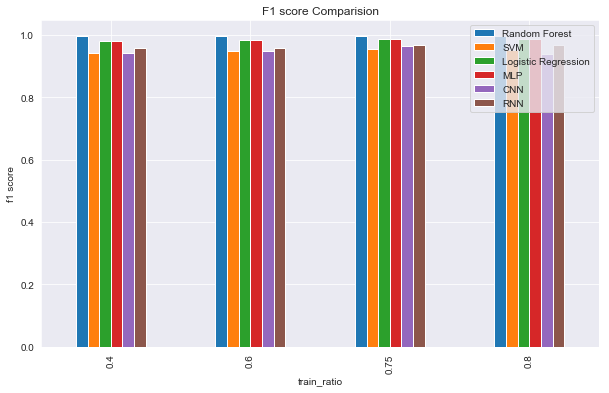

In [91]:
f1_score.index = f1_score.train_ratio
f1_score = f1_score.drop('train_ratio',axis=1)

f1_score.plot.bar(figsize=(10,6))
plt.title('F1 score Comparision')
plt.ylabel('f1 score')

In [92]:
import pandas as pd
import plotly.express as px
df = pd.read_csv(r'C:/Users/35389/OneDrive/Desktop/pen drive/code/code/accuracy.csv')
fig = px.line(df, x = 'train_ratio', y = 'SVM', title='Accuracy Comparision')
fig.show()

In [93]:
fig = px.line(df, x = 'train_ratio', y = 'CNN', title='Accuracy Comparision')
fig.show()

In [94]:
fig = px.line(df, x = 'train_ratio', y = 'RNN', title='Accuracy Comparision')
#fig = px.line(df, x = 'train_ratio', y = 'CNN', title='Accuracy Comparision')

fig.show()

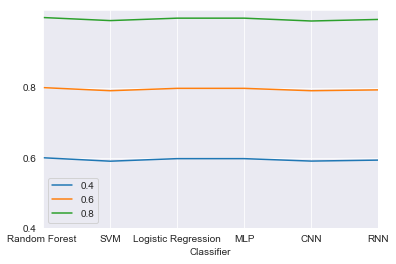

In [95]:
df = pd.read_excel(r'C:/Users/35389/OneDrive/Desktop/pen drive/ACCURACY.xlsx')
df = df.set_index("Classifier")
df /= df.values.max()
# shift colums
df += np.arange(len(df.columns))

ax = df.plot()
ax.set_yticks(np.arange(len(df.columns)))
ax.set_yticklabels(df.columns)
plt.show()

In [97]:
fig = px.line(df, x = 'train_ratio', y = 'MLP', title='Accuracy Comparision')
fig.show()